In [44]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def stock_graph(symbol, title):
    df = pd.read_csv('{}.us.txt'.format(symbol))
    df[['Close']].plot()
    plt.title(title)
    plt.show()

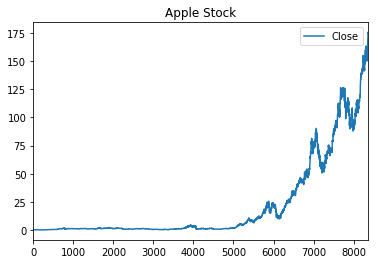

In [45]:
stock_graph("aapl","Apple Stock")

In [46]:
def stock_dataframe(symbols, dates):
    df = pd.DataFrame(index=dates)
    for symbol in symbols:
        df_temp = pd.read_csv('{}.us.txt'.format(symbol), index_col='Date', parse_dates=True, usecols=['Date','Close'], 
                              na_values=['nan'])
        df_temp = df_temp.rename(columns={'Close': symbol})
        df = df.join(df_temp)
    return df        

In [47]:
dates = pd.date_range('2016-01-02','2016-12-31', freq='B')
symbols = ['aapl', 'fb', 'googl', 'ibm']
df = stock_dataframe(symbols, dates)
#df.fillna(method='pad')

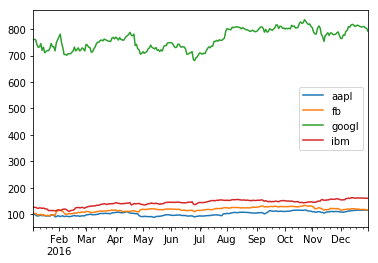

In [48]:
df.interpolate().plot()

aapl      98.885
fb       102.730
googl    761.530
ibm      125.970
Name: 2016-01-05 00:00:00, dtype: float64


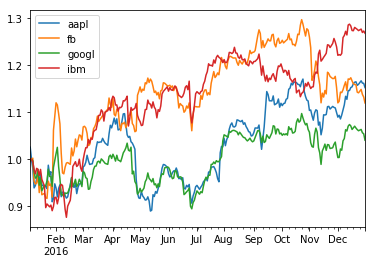

In [51]:
# Normalized Stocks - base value from 2016-01-04
print(df.iloc[1,:])
df = df / df.iloc[1, :]
df.interpolate().plot()
plt.show()